<a href="https://colab.research.google.com/github/Rashdeep9292/Online_Retail_Analysis/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing Libraries and Loading Data



In [2]:
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/online_retail_II.csv"
df = pd.read_csv(path)
df.head(197)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
192,489450,21871,SAVE THE PLANET MUG,12,2009-12-01 10:36:00,1.25,16321.0,Australia
193,489450,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,2009-12-01 10:36:00,1.25,16321.0,Australia
194,489450,84970S,HANGING HEART ZINC T-LIGHT HOLDER,24,2009-12-01 10:36:00,0.85,16321.0,Australia
195,489450,22090,PAPER BUNTING RETRO SPOTS,12,2009-12-01 10:36:00,2.95,16321.0,Australia


2. Data Cleaning

In [5]:
# Drop rows with missing CustomerID
df.dropna(subset=["Customer ID"], inplace=True)

# Remove canceled orders (they have negative quantities)
df = df[df["Quantity"] > 0]

3. Creating a TotalPrice column to calculate revenue per transaction.

In [8]:
df.loc[:, "TotalPrice"] = df["Quantity"] * df["Price"]

4. Top Products by Quantity Sold

In [10]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(30)
print(top_products)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      109169
WHITE HANGING HEART T-LIGHT HOLDER      93640
PAPER CRAFT , LITTLE BIRDIE             80995
ASSORTED COLOUR BIRD ORNAMENT           79913
MEDIUM CERAMIC TOP STORAGE JAR          77916
JUMBO BAG RED RETROSPOT                 75759
BROCADE RING PURSE                      71129
PACK OF 60 PINK PAISLEY CAKE CASES      55270
60 TEATIME FAIRY CAKE CASES             53495
PACK OF 72 RETROSPOT CAKE CASES         46107
PACK OF 72 RETRO SPOT CAKE CASES        45156
SMALL POPCORN HOLDER                    43970
MINI PAINT SET VINTAGE                  43621
ASSORTED COLOURS SILK FAN               41078
COLOUR GLASS T-LIGHT HOLDER HANGING     39643
PACK OF 72 SKULL CAKE CASES             38927
PACK OF 12 LONDON TISSUES               38084
VICTORIAN GLASS HANGING T-LIGHT         37851
RED  HARMONICA IN BOX                   37097
JUMBO BAG STRAWBERRY                    36098
STRAWBERRY CERAMIC TRINKET BOX          34726
GIRLS ALPHABET IRON ON

5. Date Handling and RFM Analysis

In [18]:
import pandas as pd
import datetime as dt

# Check column names first
print(df.columns.tolist())

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["Price"]

# Set reference date
ref_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

# Adjust to your actual column name - Assuming the correct column is 'Invoice' instead of 'InvoiceNo'
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (ref_date - x.max()).days,  # Recency
    # Corrected column name from "InvoiceNo" to "Invoice"
    "Invoice": "nunique",                              # Frequency
    "TotalPrice": "sum"                                  # Monetary
}).reset_index()

# Rename for consistency
# Ensure the column name in the rename matches the corrected column name
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Show result
rfm.head()

['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'TotalPrice']


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,12,77556.46
1,12347.0,2,8,5633.32
2,12348.0,75,5,2019.40
3,12349.0,19,4,4428.69
4,12350.0,310,1,334.40


6. Monthly Sales Trend

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

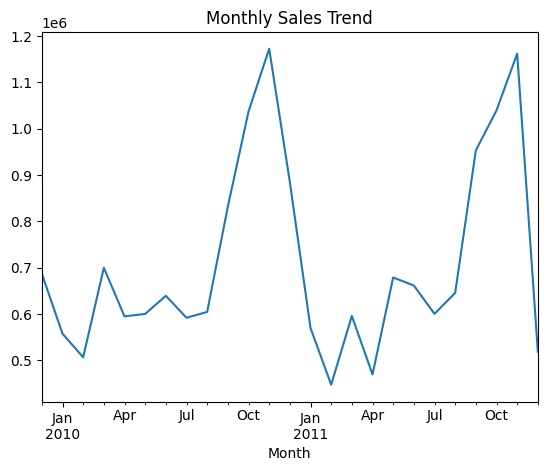

In [19]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(kind="line", title="Monthly Sales Trend")

7. Revenue by Country

In [20]:
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
print(country_revenue)

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64


8. Returns / Cancelled Orders

In [27]:
# Filter canceled orders (if still available)
# Check if 'InvoiceNo' column exists before proceeding
if 'Invoice' in df.columns:
    returns = df[df["Invoice"].astype(str).str.startswith('C')]
    returns_products = returns["Description"].value_counts().head(5)
    print(returns_products)
else:
    print("Error: 'InvoiceNo' column not found in the DataFrame. Please check your data or previous steps.")

Series([], Name: count, dtype: int64)


9. One-time vs Repeat Customers

In [25]:
customer_order_counts = df.groupby("Customer ID")["Invoice"].nunique()
one_time = (customer_order_counts == 1).sum()
repeat = (customer_order_counts > 1).sum()

print(f"One-time customers: {one_time}")
print(f"Repeat customers: {repeat}")

One-time customers: 1626
Repeat customers: 4255


In [28]:
rfm.to_csv("rfm_analysis.csv", index=False)

10. Top Products by Revenue - Bar Chart

/tmp/ipython-input-29-2539418531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


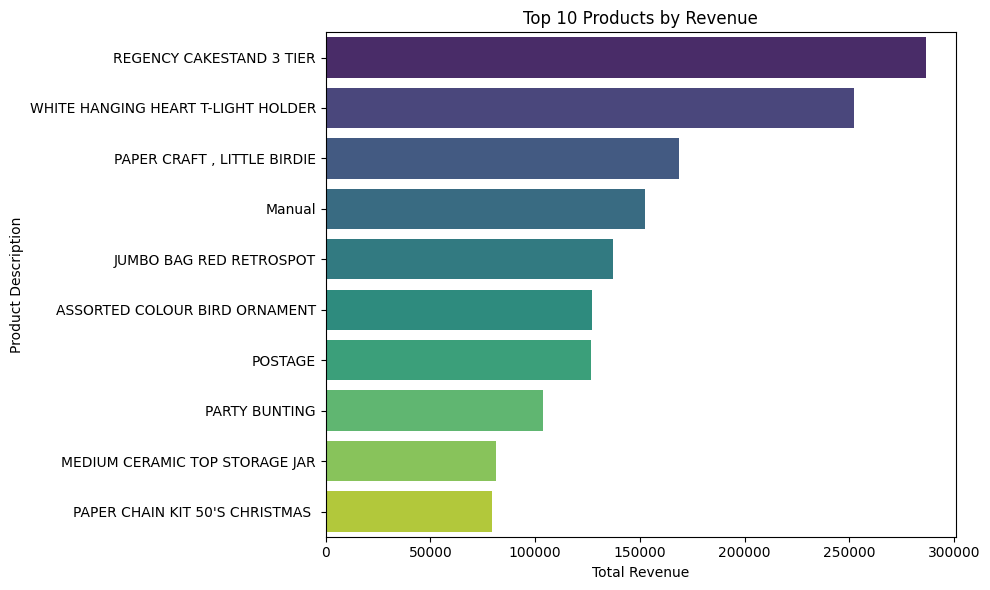

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


11. Monthly Revenue Visualization

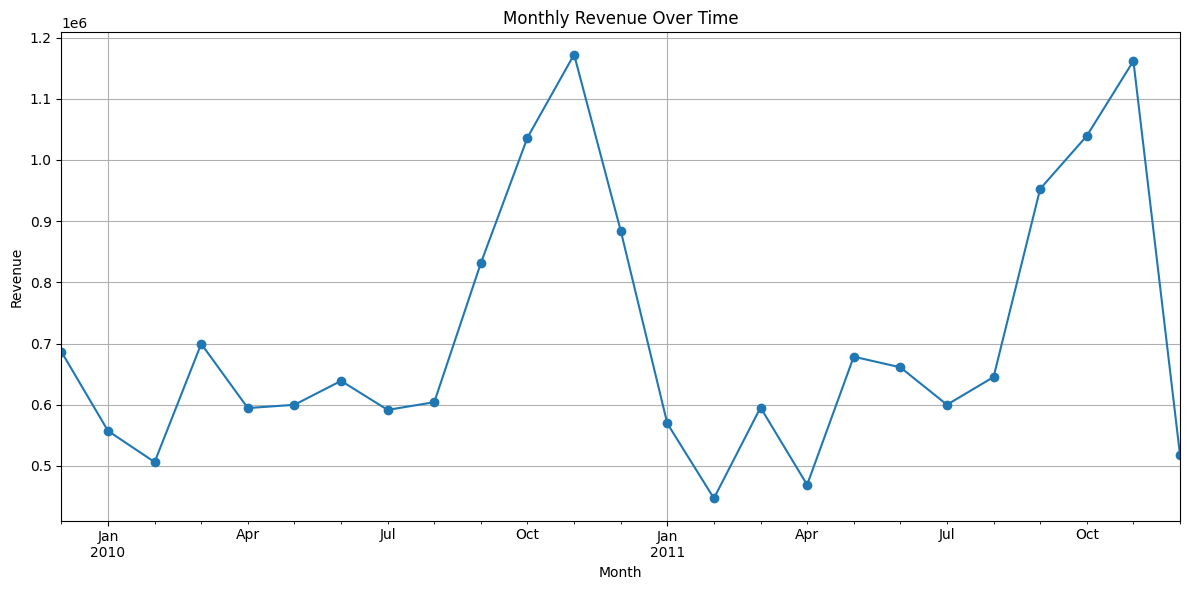

In [30]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


12. RFM Distributions

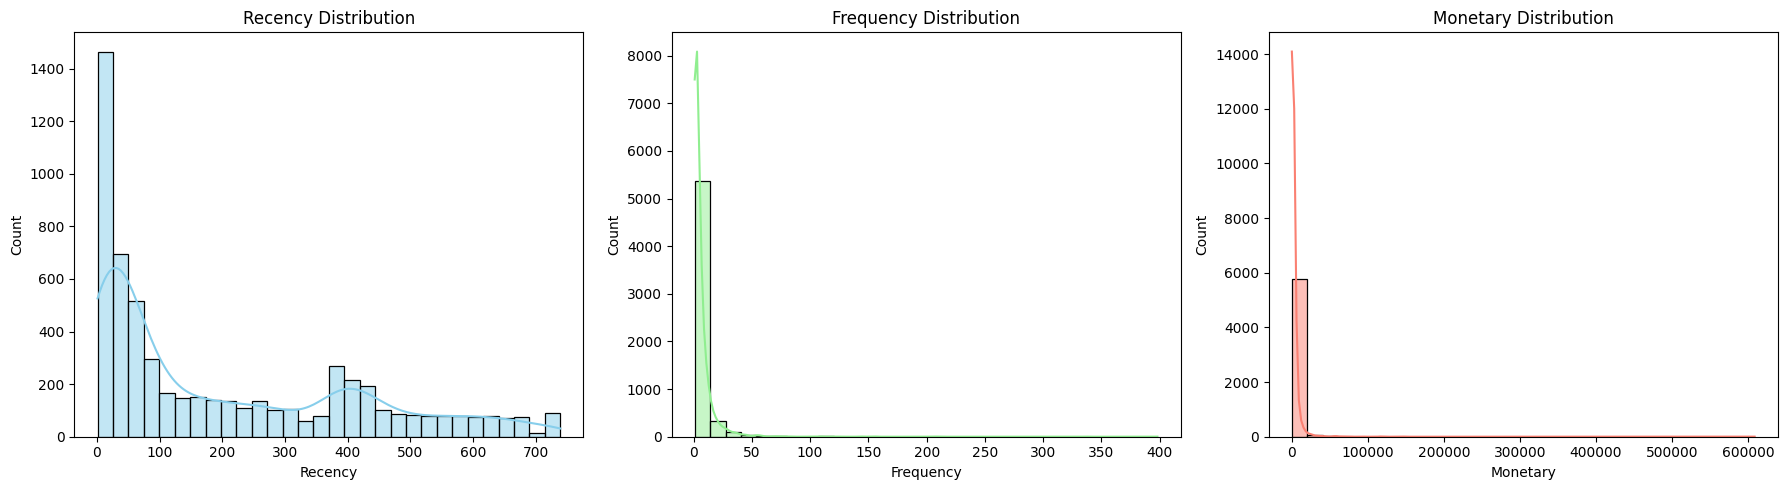

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=30, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title("Recency Distribution")

sns.histplot(rfm["Frequency"], bins=30, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title("Frequency Distribution")

sns.histplot(rfm["Monetary"], bins=30, kde=True, ax=ax[2], color='salmon')
ax[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()


13. Churn Analysis - Pie Chart

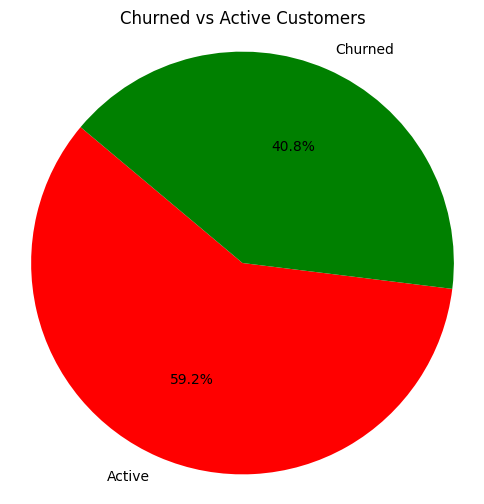

In [32]:
# Assume churned if no purchase in last 6 months (you can adjust threshold)
churn_threshold = 180
rfm["ChurnStatus"] = rfm["Recency"].apply(lambda x: "Churned" if x > churn_threshold else "Active")

churn_counts = rfm["ChurnStatus"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title("Churned vs Active Customers")
plt.axis('equal')
plt.show()


14. Top Countries by Revenue (Excluding UK)

/tmp/ipython-input-33-4229486160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="coolwarm")


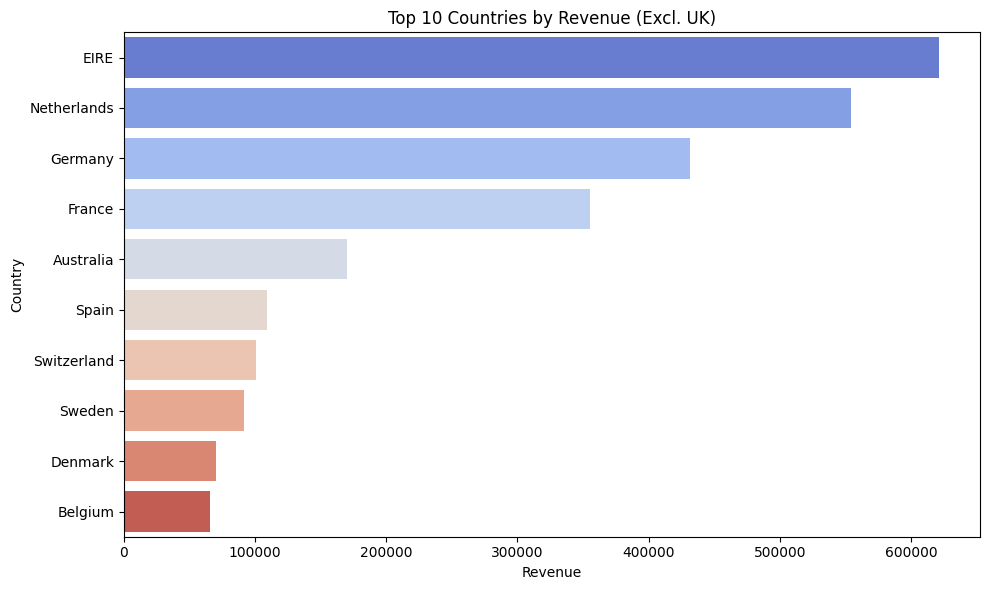

In [33]:
country_revenue = df[df["Country"] != "United Kingdom"].groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="coolwarm")
plt.title("Top 10 Countries by Revenue (Excl. UK)")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [34]:
df.to_csv("cleaned_sales.csv", index=False)
rfm.to_csv("rfm_analysis.csv", index=False)


In [35]:
from google.colab import files
files.download("cleaned_sales.csv")
files.download("rfm_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>